# Forecasting Recessions in the US Economy

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
import nasdaqdatalink as nd

In [10]:
df = pd.read_csv("src/economic_indicators.csv", parse_dates=["DATE"], index_col='DATE')

In [11]:
df.head()

,cpi,ppi,eff,sentiement,nonfarm,ism,spx,gold,usoil,us10y,us2y,yc
DATE,,,,,,,,,,,,
1989-01-31,121.2,110.5,9.14,97.9,107161,54.7,296.84,393.100006,17.73,8.988,9.113,-0.125000
1989-02-28,121.6,110.8,9.87,95.4,107427,54.1,289.95,386.600006,18.72,9.318,9.532,-0.214000
1989-03-31,122.2,111.5,9.79,94.3,107621,51.5,292.52,385.100006,20.81,9.334,9.803,-0.469001
1989-04-30,123.1,112.3,9.82,91.5,107791,52.2,307.77,377.000000,20.58,9.062,9.214,-0.151999
1989-05-31,123.7,113.2,10.48,90.7,107913,49.3,321.97,368.600006,19.81,8.603,8.819,-0.216001


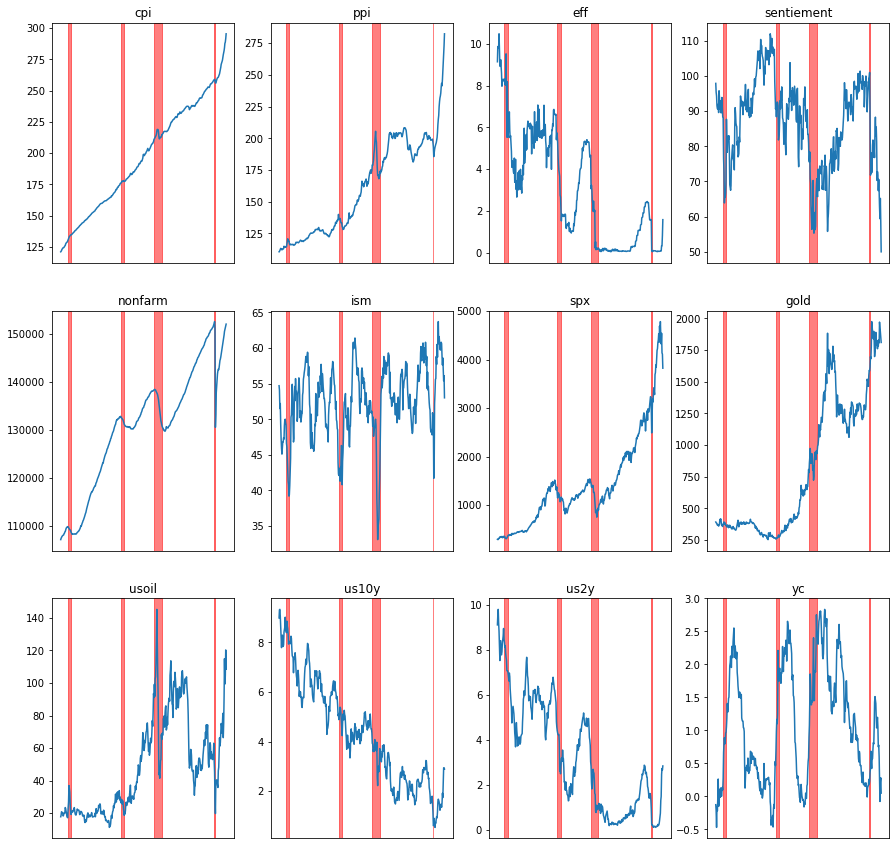

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

r_periods = (['1990-07', '1991-03'], 
             ['2001-03', '2001-11'],
             ['2007-12', '2009-07'],
             ['2020-02', '2020-04'] )
cols = df.columns

fig = plt.figure(figsize=(15,15))

for idx, col in enumerate(cols):
    sub = fig.add_subplot(3,4,idx + 1)
    sub.set_title(col)
    sub.set_xticks([])
    sub.plot(df[col])
    for r in r_periods:
        sub.axvspan(*mdates.datestr2num(r), color='red', alpha=0.5)
    

## Preprocessing

In [29]:
# Label Recessions
df['label'] = 0
for r in r_periods:
    df.loc[r[0]: r[1], 'label'] = 1
df[df.label == 1].head()

,cpi,ppi,eff,sentiement,nonfarm,ism,spx,gold,usoil,us10y,us2y,yc,label
DATE,,,,,,,,,,,,,
1990-07-31,130.5,114.5,8.05,88.2,109824,46.6,351.48,377.399994,23.11,8.392,8.121,0.271,1
1990-08-31,131.6,116.5,8.06,76.4,109616,46.1,318.71,382.299988,26.77,8.859,8.191,0.668,1
1990-09-30,132.5,118.4,8.03,72.8,109518,44.5,312.69,393.600006,36.93,8.652,7.856,0.796,1
1990-10-31,133.4,120.8,9.52,63.9,109367,43.2,307.02,376.399994,35.17,8.555,7.664,0.891,1
1990-11-30,133.7,120.1,7.61,66.0,109214,41.3,316.42,383.299988,32.91,8.345,7.550,0.795,1


# Model